In [9]:
import numpy as np
import scipy as sp
import scipy.io as spio
import scipy.signal as spsignal
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import lfilter

# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: 
## Matrícula: 

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [1]:
# Código das funções utilizadas.
def deg(n):
    if n >= 0:
        return 1
    else:
        return 0

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [3]:
#Resposta da questão 1a

# TODO add foto quando for mandar

## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [4]:
#Resposta da questão 1b

# TODO add foto quando for mandar

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

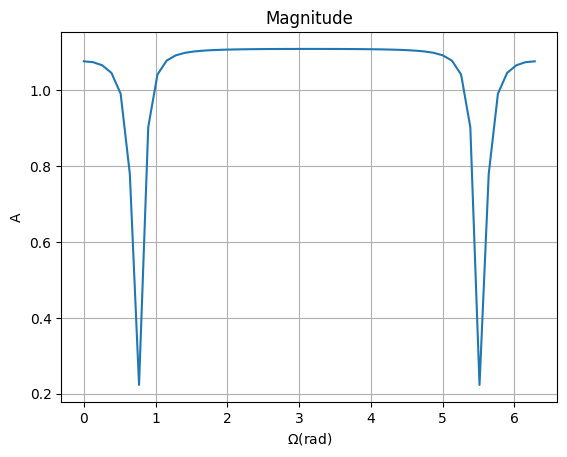

In [4]:
# Resposta da questão 1c
def A1(x):
    return np.sqrt((4.132 - 5.84 * np.cos(x) + 2 * np.cos(2*x))/(3.372 - 4.74 * np.cos(x) + 1.62 * np.cos(2*x)))


x = np.linspace(0, np.pi * 2)

plt.plot(x, A1(x))
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('A')
plt.title("Magnitude")
plt.grid(True)
plt.show()

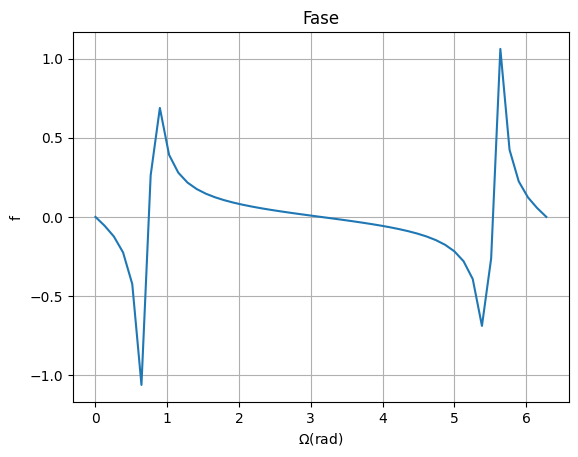

In [5]:
def F(x):
    return np.arctan((0.27 * np.sin(x) - 0.19 * np.sin(2*x))/(3.72 - 5.27 * np.cos(x) + 1.81 * np.cos(2*x)))


plt.plot(x, F(x))
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('f')
plt.title("Fase")
plt.grid(True)
plt.show()

## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

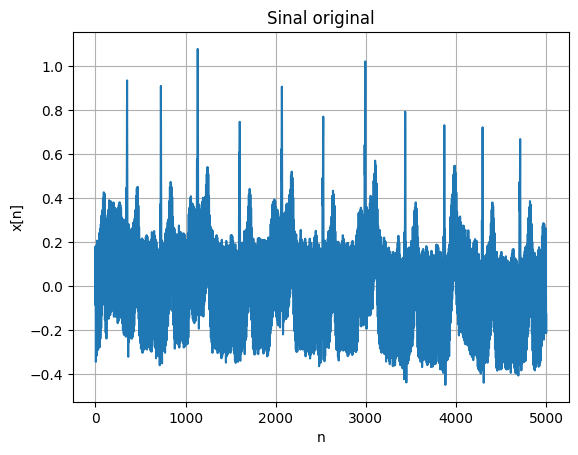

In [6]:
# Resposta da questão 1d
sinal = spio.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()

plt.plot(sinal)
plt.xlabel("n")
plt.ylabel('x[n]')
plt.title("Sinal original")
plt.grid(True)
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_32396\3738380504.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  h[n] = (-0.117284 + 0.00640434j) * np.exp((-0.105361 - 0.766994j) * n) - (0.117284 + 0.00640434j) * np.exp((-0.105361 + 0.766994j) * n)


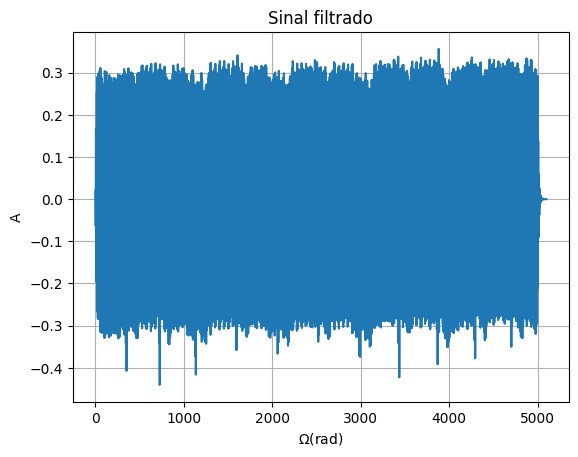

In [7]:
h = np.zeros(100)

# Transformada inversa feita pelo WolframAlpha
for n in range(100):
    h[n] = (-0.117284 + 0.00640434j) * np.exp((-0.105361 - 0.766994j) * n) - (0.117284 + 0.00640434j) * np.exp((-0.105361 + 0.766994j) * n)

filtrado = np.convolve(sinal, h)

plt.plot(filtrado)
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('A')
plt.title("Sinal filtrado")
plt.grid(True)
plt.show()

# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [7]:
#Resposta da questão 2a

# TODO add foto!!!! codigo Image.open()

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [8]:
#Resposta da questão 2b

# TODO add foto!!!

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

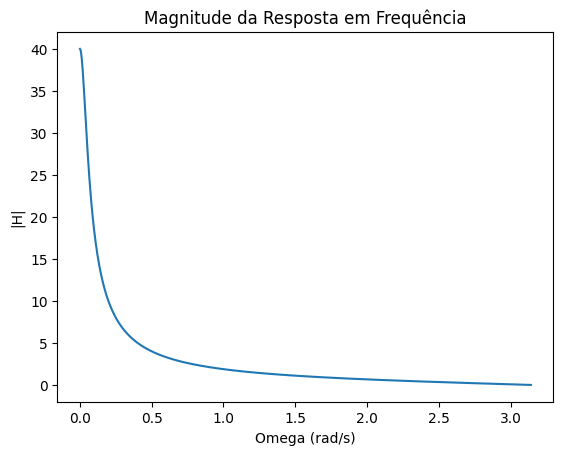

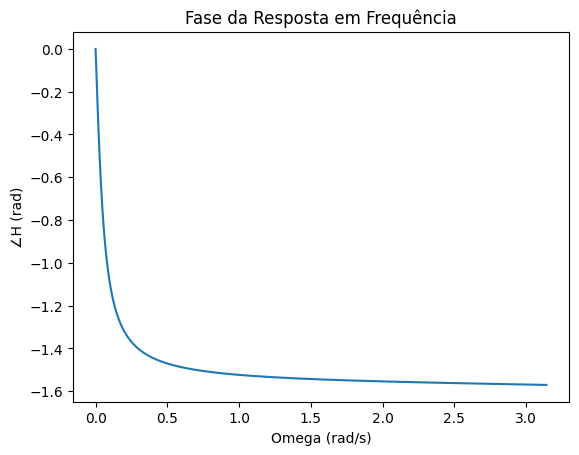

In [8]:
# Resposta da questão 2c

zero = -1
polo = 0.95

Omega = np.linspace(0, np.pi, 1000)

H_magnitude = np.zeros_like(Omega)
H_phase = np.zeros_like(Omega)

for i, omega in enumerate(Omega):
    H = (np.exp(1j * omega) - zero) / (np.exp(1j * omega) - polo)
    H_magnitude[i] = np.abs(H)
    H_phase[i] = np.angle(H)


plt.plot(Omega, H_magnitude)
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Omega (rad/s)')
plt.ylabel('|H|')
plt.show()

plt.plot(Omega, H_phase)
plt.title('Fase da Resposta em Frequência')
plt.xlabel('Omega (rad/s)')
plt.ylabel('∠H (rad)')
plt.show()

## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

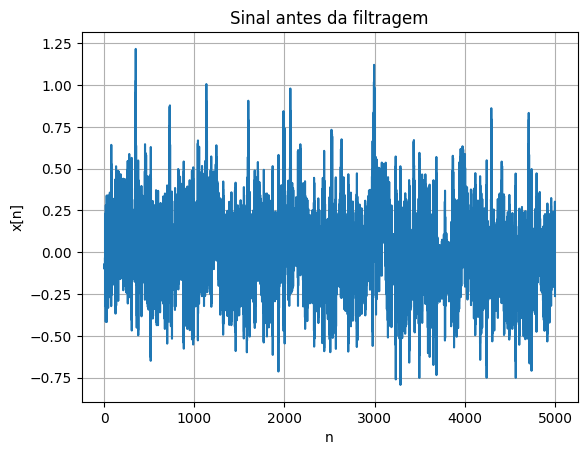

In [10]:
#Resposta da questão 2d

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

hn = np.zeros(500)

for n in range(500):
    if n == 0:
        hn[n] = 1
    else:
        deg = lambda n: n
        hn[n] = 2.05263 * np.exp(-0.0512933 * n) * deg(n)

sinalFiltrado = lfilter(hn, [1], sinal)  

plt.plot(sinal)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Sinal antes da filtragem")
plt.grid(True)
plt.show()

# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [11]:
#Resposta da questão 3a

## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [12]:
#Resposta da questão 3b

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

In [13]:
#Resposta da questão 3c

## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

In [14]:
#Resposta da questão 3d